<a href="https://colab.research.google.com/github/sudarmintosenlau/Machine-Learning-with-Python/blob/main/Membuat_Model_Machine_Learning_dengan_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>INFORMASI DIRI</center></h1>

---

**Sudarminto Senlau**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
**085739022843**

![an image](https://img.icons8.com/fluent-systems-regular/2x/gmail.png)
**sudarmintosenlau37@gmail.com**

![an image](https://img.icons8.com/material-rounded/2x/address.png)
**Kupang, Nusa Tenggara Timur**

![an image](https://img.icons8.com/fluent-systems-filled/2x/linkedin.png)
[Linkedin](https://www.linkedin.com/in/sudarminto-senlau/)

---

<h1><center>Submission at Dicoding</center></h1>

#### Membuat Model Machine Learning dengan Data Time Series: Peramalan Penutupan Harga Saham

In [1]:
# Mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from google.colab import files
filenya = files.upload()

Saving prices-split-adjusted.csv to prices-split-adjusted.csv


In [2]:
# Membuat dataframe dari dateset
data = pd.read_csv('prices-split-adjusted.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
data = data[data['symbol']=='AAP']
data

,date,symbol,open,close,low,high,volume
253,2010-01-04,AAP,40.700001,40.380001,40.360001,41.040001,1701700.0
720,2010-01-05,AAP,40.299999,40.139999,39.720001,40.310001,1932400.0
1188,2010-01-06,AAP,40.049999,40.490002,40.049999,40.779999,1406200.0
1656,2010-01-07,AAP,39.549999,40.480000,39.549999,40.540001,1256800.0
2124,2010-01-08,AAP,40.250000,40.639999,40.110001,40.820000,960300.0
...,...,...,...,...,...,...,...
848766,2016-12-23,AAP,170.690002,170.889999,170.000000,172.080002,334200.0
849266,2016-12-27,AAP,170.720001,171.839996,170.720001,172.750000,508700.0
849766,2016-12-28,AAP,172.009995,170.419998,170.350006,172.929993,357100.0
850266,2016-12-29,AAP,170.080002,170.279999,169.460007,171.080002,431400.0


In [4]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [5]:
data_close = data.reset_index()['close']
data_close.tail()

1757    170.889999
1758    171.839996
1759    170.419998
1760    170.279999
1761    169.119995
Name: close, dtype: float64

In [7]:
data_close.shape

(1762,)

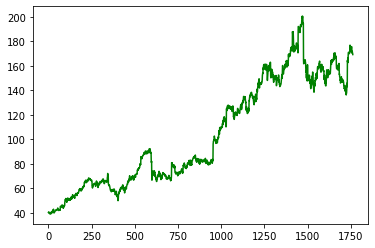

In [9]:
plt.plot(data_close, color = "green")
plt.show()

Preproses dengan melakukan Normalisasi (MinMaxScaler)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [11]:
data_close.shape

(1762, 1)

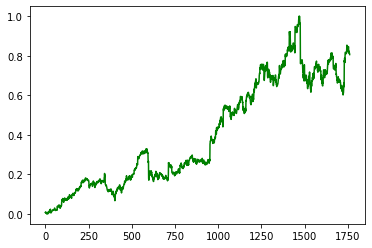

In [12]:
plt.plot(data_close, color = "green")
plt.show()

In [13]:
train_size = int(len(data_close)*0.8)
test_size = len(data_close) - train_size
train_data = data_close[0:train_size,:]
test_data = data_close[train_size:,:]

In [14]:
train_size, test_size

(1409, 353)

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step),0])
        dataY.append(dataset[(i+time_step),0])
    
    return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [17]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1308, 100), (1308,), (252, 100), (252,))

In [18]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],1)

In [19]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1308, 100, 1), (1308,), (252, 100, 1), (252,))

In [22]:
import tensorflow as tf
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-04)
model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(train_x, train_y, 
                          validation_data=(test_x, test_y), 
                          epochs=100, batch_size=64)

Epoch 1/100
21/21 [==============================] - 10s 237ms/step - loss: 0.0503 - mae: 0.2461 - val_loss: 0.0379 - val_mae: 0.2702
Epoch 2/100
21/21 [==============================] - 4s 180ms/step - loss: 0.0045 - mae: 0.0819 - val_loss: 0.0059 - val_mae: 0.0958
Epoch 3/100
21/21 [==============================] - 4s 176ms/step - loss: 0.0020 - mae: 0.0523 - val_loss: 0.0013 - val_mae: 0.0412
Epoch 4/100
21/21 [==============================] - 4s 181ms/step - loss: 8.7691e-04 - mae: 0.0350 - val_loss: 0.0014 - val_mae: 0.0417
Epoch 5/100
21/21 [==============================] - 4s 180ms/step - loss: 4.6416e-04 - mae: 0.0238 - val_loss: 0.0014 - val_mae: 0.0427
Epoch 6/100
21/21 [==============================] - 4s 181ms/step - loss: 4.1002e-04 - mae: 0.0212 - val_loss: 0.0015 - val_mae: 0.0450
Epoch 7/100
21/21 [==============================] - 4s 188ms/step - loss: 4.0585e-04 - mae: 0.0209 - val_loss: 0.0016 - val_mae: 0.0454
Epoch 8/100
21/21 [==============================] -

In [24]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

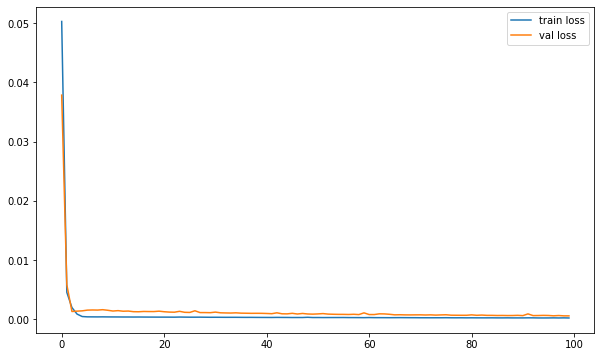

In [25]:
plt.figure(figsize=[10,6])
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

Prediksi dalam Grafik

In [26]:
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

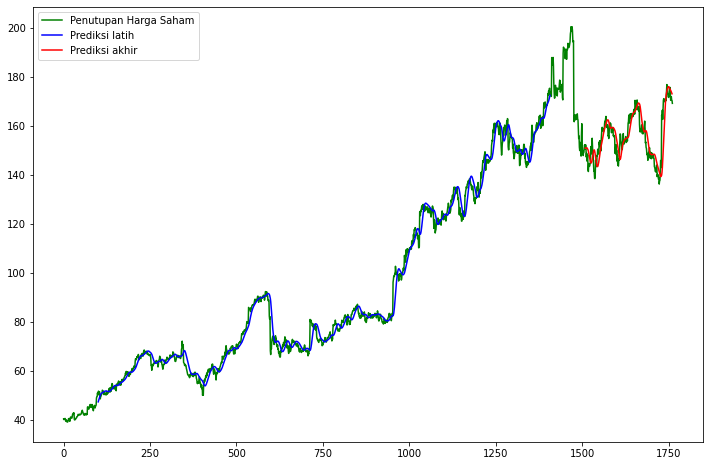

In [27]:
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step,:] = train_predict

testPredictPlot = np.empty_like(data_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step*2) +1:len(data_close)-1, :] = test_predict

plt.figure(figsize=[12,8])
plt.plot(scaler.inverse_transform(data_close), color = "green", label = 'Penutupan Harga Saham')
plt.plot(scaler.inverse_transform(trainPredictPlot), color = "blue", label = 'Prediksi latih')
plt.plot(scaler.inverse_transform(testPredictPlot), color = "red", label = 'Prediksi akhir')
plt.legend()
plt.show()